<a href="https://colab.research.google.com/github/falahamro/Deep-Learning/blob/main/PCA_and_TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dve_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Clustering_Kmeans/dev_final_raw.csv")

In [ ]:
dve_df.replace(np.nan, 0, inplace = True)

In [ ]:

dve_df["created_at_dt"] = dve_df["created_at"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.000Z").replace(tzinfo=None))
dve_df["survivability"] = dve_df["created_at_dt"].apply(lambda x: (datetime.datetime.now()-x).days)

In [ ]:
dve_df.drop('urls__end', axis=1, inplace=True)


In [ ]:
dve_df['folws_stat_foloing_rt']=dve_df['followers_count']**2+dve_df['following_count']-dve_df['following_count']
dve_df['Influence']=np.log(dve_df['folws_stat_foloing_rt']+1)

In [ ]:
dve_df['followee_followers_rt']=dve_df["following_count"]+1/dve_df["followers_count"]+1
dve_df['sociability']=np.log(dve_df['followee_followers_rt']+1)

dve_df['likes_tweets_rt']=dve_df["like_count"]+1/dve_df["tweet_count"]+1
dve_df['favorabilty']=np.log(dve_df['likes_tweets_rt']+1)

#dve_df['tweets_likes_rt']=dve_df["tweet_count"]+1/dve_df["like_count"]+1
#dve_df['favorabilty_orig']=np.log(dve_df['tweets_likes_rt']+1)

#dve_df['followers_retw_rt']=dve_df["followers_count"]+1/dve_df["retweet_count"]+1
#dve_df['Popularity']=np.log(dve_df['followers_retw_rt']+1)

dve_df["survivability"] = dve_df["created_at_dt"].apply(lambda x: (datetime.datetime.now()-x).days)

dve_df["tw_dy_rt"] = dve_df["tweet_count"]+1/dve_df["survivability"]+1
dve_df["activiness"] = np.log(dve_df['tw_dy_rt']+1)


In [ ]:
dve_df.drop('created_at', axis=1, inplace=True)
dve_df.drop('created_at_dt', axis=1, inplace=True)

In [ ]:
dve_df.drop_duplicates(subset=['author_id'], inplace=True)


In [ ]:
dve_df.head()

,mentions,author_id,users_verified,hashtags_end,followers_count,following_count,tweet_count,listed_count,urls_end,retweet_count,...,quote_count,survivability,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty,tw_dy_rt,activiness
0,16.0,1.929236e+07,0.0,0.0,14.0,177.0,36.0,0.0,0.0,11241,...,345,4013,196.0,5.283204,178.071429,5.187785,2.335403e+04,10.058568,37.000249,3.637593
1,22.0,1.210000e+18,0.0,0.0,78.0,164.0,426.0,0.0,0.0,11243,...,345,4013,6084.0,8.713582,165.012821,5.112065,2.342400e+04,10.061559,427.000249,6.059124
4,0.0,1.310000e+18,0.0,0.0,62.0,126.0,5282.0,0.0,0.0,1322,...,152,2324,3844.0,8.254529,127.016129,4.852156,1.350000e+03,7.208600,5283.000430,8.572439
5,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179259,...,74529,2176,0.0,0.000000,NaN,NaN,NaN,NaN,1.000460,0.693377
7,9.0,3.558913e+08,0.0,0.0,282.0,289.0,84653.0,4.0,0.0,179259,...,74529,2176,79524.0,11.283827,290.003546,5.673335,2.767110e+05,12.530733,84654.000460,11.346339


In [ ]:
dve_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7255 entries, 0 to 39548
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mentions               7255 non-null   float64
 1   author_id              7255 non-null   float64
 2   users_verified         7255 non-null   float64
 3   hashtags_end           7255 non-null   float64
 4   followers_count        7255 non-null   float64
 5   following_count        7255 non-null   float64
 6   tweet_count            7255 non-null   float64
 7   listed_count           7255 non-null   float64
 8   urls_end               7255 non-null   float64
 9   retweet_count          7255 non-null   int64  
 10  reply_count            7255 non-null   int64  
 11  like_count             7255 non-null   int64  
 12  quote_count            7255 non-null   int64  
 13  survivability          7255 non-null   int64  
 14  folws_stat_foloing_rt  7255 non-null   float64
 15  Inf

In [ ]:
# Data Preprocessing and Exploratory Data Analysis

In [ ]:
dve_df.author_id.nunique()

7255

In [ ]:
dve_df.mentions.nunique

<bound method IndexOpsMixin.nunique of 0        16.0
1        22.0
4         0.0
5         0.0
7         9.0
         ... 
39521    26.0
39527    24.0
39536     0.0
39542    21.0
39548    12.0
Name: mentions, Length: 7255, dtype: float64>

In [ ]:
#droppig na if any
dve_df = dve_df.dropna(how = 'any')
dve_df.head(5)
dve_df.fillna(0)
dve_df.fillna(0,inplace=True)
dve_df.fillna(0,inplace=True)
dve_df.replace([np.inf, -np.inf], np.nan, inplace=True)
dve_df.replace(np.nan, 0)


,mentions,author_id,users_verified,hashtags_end,followers_count,following_count,tweet_count,listed_count,urls_end,retweet_count,...,quote_count,survivability,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty,tw_dy_rt,activiness
0,16.0,1.929236e+07,0.0,0.0,14.0,177.0,36.0,0.0,0.0,11241,...,345,4013,1.960000e+02,5.283204,178.071429,5.187785,23354.027778,10.058568,37.000249,3.637593
1,22.0,1.210000e+18,0.0,0.0,78.0,164.0,426.0,0.0,0.0,11243,...,345,4013,6.084000e+03,8.713582,165.012821,5.112065,23424.002347,10.061559,427.000249,6.059124
4,0.0,1.310000e+18,0.0,0.0,62.0,126.0,5282.0,0.0,0.0,1322,...,152,2324,3.844000e+03,8.254529,127.016129,4.852156,1350.000189,7.208600,5283.000430,8.572439
7,9.0,3.558913e+08,0.0,0.0,282.0,289.0,84653.0,4.0,0.0,179259,...,74529,2176,7.952400e+04,11.283827,290.003546,5.673335,276711.000012,12.530733,84654.000460,11.346339
15,0.0,7.140000e+17,1.0,28.0,512453.0,29593.0,222121.0,2238.0,0.0,23079,...,27994,2046,2.626081e+11,26.293929,29594.000002,10.295361,40994.000005,10.621205,222122.000489,12.310987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39521,26.0,3.255539e+07,0.0,0.0,1592.0,4402.0,88860.0,87.0,0.0,0,...,0,354,2.534464e+06,14.745493,4403.000628,8.390269,1.000011,0.693153,88861.002825,11.394840
39527,24.0,8.170270e+07,0.0,0.0,1029.0,343.0,83622.0,23.0,0.0,0,...,0,354,1.058841e+06,13.872686,344.000972,5.843547,1.000012,0.693153,83623.002825,11.334086
39536,0.0,5.763262e+06,1.0,0.0,1449796.0,2015.0,159593.0,16024.0,0.0,6,...,7,353,2.101908e+12,28.373867,2016.000001,7.609367,21.000006,3.091043,159594.002833,11.980395
39542,21.0,2.896184e+09,0.0,0.0,44.0,97.0,1034.0,0.0,0.0,221,...,124,353,1.936000e+03,7.568896,98.022727,4.595349,1693.000967,7.434848,1035.002833,6.943125


In [ ]:
# Summary Statisitics 

In [ ]:
dve_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mentions,7228.0,4.325028e+01,8.091600e+01,0.000000,0.000000e+00,1.500000e+01,3.800000e+01,6.650000e+02
author_id,7228.0,4.004718e+16,1.871683e+17,12.000000,3.529570e+07,2.465610e+08,1.328771e+09,1.480000e+18
users_verified,7228.0,2.046209e-01,4.034523e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
hashtags_end,7228.0,1.280866e+01,3.391094e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+02
followers_count,7228.0,3.313488e+05,3.246168e+06,1.000000,3.390000e+02,1.496000e+03,1.451300e+04,1.312263e+08
following_count,7228.0,3.936334e+03,1.419627e+04,0.000000,4.920000e+02,1.172500e+03,3.094750e+03,5.862540e+05
tweet_count,7228.0,5.247993e+04,9.436347e+04,1.000000,6.996000e+03,2.027350e+04,5.733200e+04,2.400285e+06
listed_count,7228.0,1.251972e+03,7.784899e+03,0.000000,3.000000e+00,1.500000e+01,1.425000e+02,2.222220e+05
urls_end,7228.0,1.191339e+00,1.151887e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.680000e+02
retweet_count,7228.0,3.587488e+03,1.487041e+04,0.000000,0.000000e+00,7.100000e+01,1.679750e+03,4.448050e+05


In [ ]:
dve_df[(dve_df.activiness>3)] 

,mentions,author_id,users_verified,hashtags_end,followers_count,following_count,tweet_count,listed_count,urls_end,retweet_count,...,quote_count,survivability,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty,tw_dy_rt,activiness
0,16.0,1.929236e+07,0.0,0.0,14.0,177.0,36.0,0.0,0.0,11241,...,345,4013,1.960000e+02,5.283204,178.071429,5.187785,23354.027778,10.058568,37.000249,3.637593
1,22.0,1.210000e+18,0.0,0.0,78.0,164.0,426.0,0.0,0.0,11243,...,345,4013,6.084000e+03,8.713582,165.012821,5.112065,23424.002347,10.061559,427.000249,6.059124
4,0.0,1.310000e+18,0.0,0.0,62.0,126.0,5282.0,0.0,0.0,1322,...,152,2324,3.844000e+03,8.254529,127.016129,4.852156,1350.000189,7.208600,5283.000430,8.572439
7,9.0,3.558913e+08,0.0,0.0,282.0,289.0,84653.0,4.0,0.0,179259,...,74529,2176,7.952400e+04,11.283827,290.003546,5.673335,276711.000012,12.530733,84654.000460,11.346339
15,0.0,7.140000e+17,1.0,28.0,512453.0,29593.0,222121.0,2238.0,0.0,23079,...,27994,2046,2.626081e+11,26.293929,29594.000002,10.295361,40994.000005,10.621205,222122.000489,12.310987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39521,26.0,3.255539e+07,0.0,0.0,1592.0,4402.0,88860.0,87.0,0.0,0,...,0,354,2.534464e+06,14.745493,4403.000628,8.390269,1.000011,0.693153,88861.002825,11.394840
39527,24.0,8.170270e+07,0.0,0.0,1029.0,343.0,83622.0,23.0,0.0,0,...,0,354,1.058841e+06,13.872686,344.000972,5.843547,1.000012,0.693153,83623.002825,11.334086
39536,0.0,5.763262e+06,1.0,0.0,1449796.0,2015.0,159593.0,16024.0,0.0,6,...,7,353,2.101908e+12,28.373867,2016.000001,7.609367,21.000006,3.091043,159594.002833,11.980395
39542,21.0,2.896184e+09,0.0,0.0,44.0,97.0,1034.0,0.0,0.0,221,...,124,353,1.936000e+03,7.568896,98.022727,4.595349,1693.000967,7.434848,1035.002833,6.943125


In [ ]:
dve_df = dve_df.dropna(how = "all")              # Apply dropna() function


In [ ]:
# Check distribution and outliers for each attribute in the dataset

mentions
Skew : 3.75


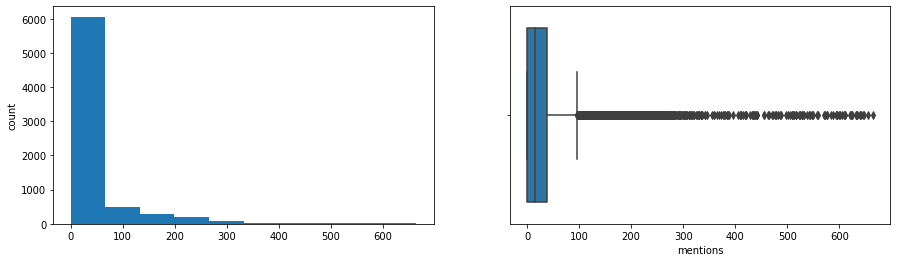

author_id
Skew : 4.62


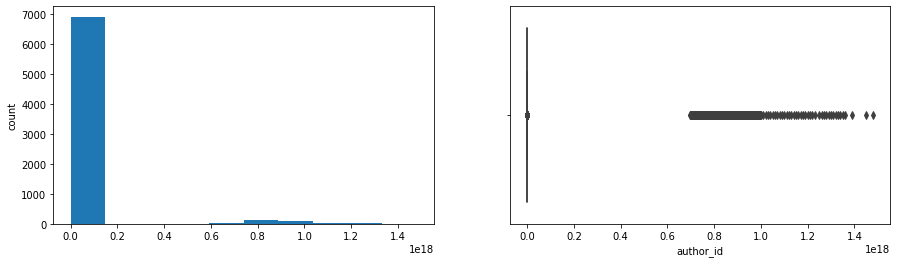

users_verified
Skew : 1.46


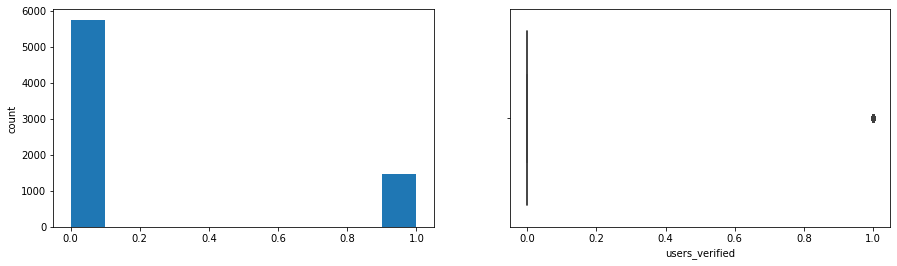

hashtags_end
Skew : 2.76


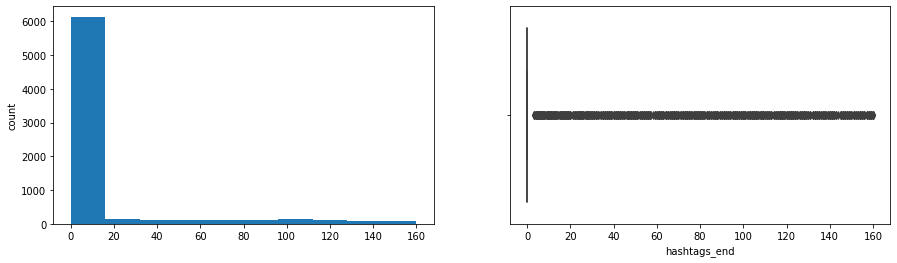

followers_count
Skew : 23.46


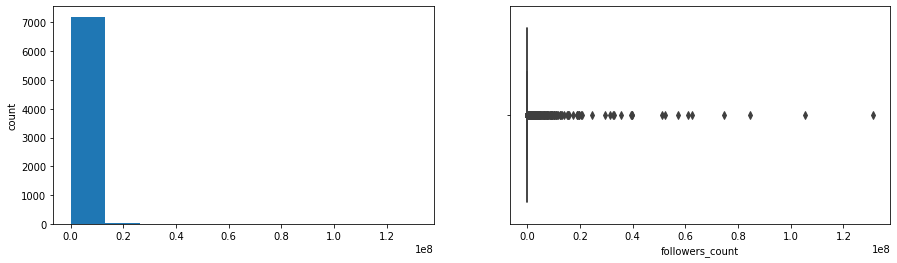

following_count
Skew : 18.64


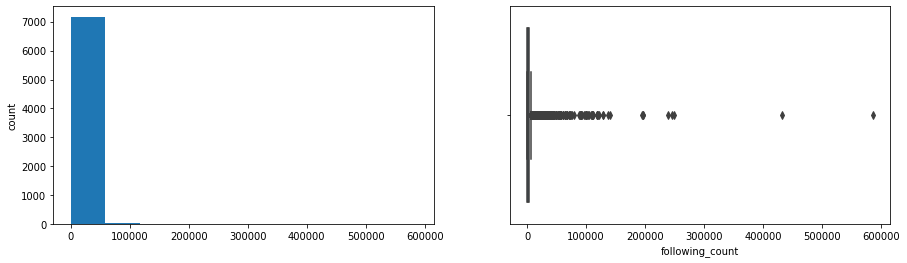

tweet_count
Skew : 6.22


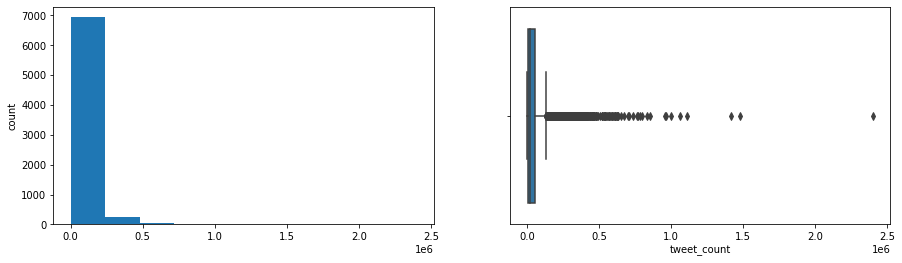

listed_count
Skew : 16.67


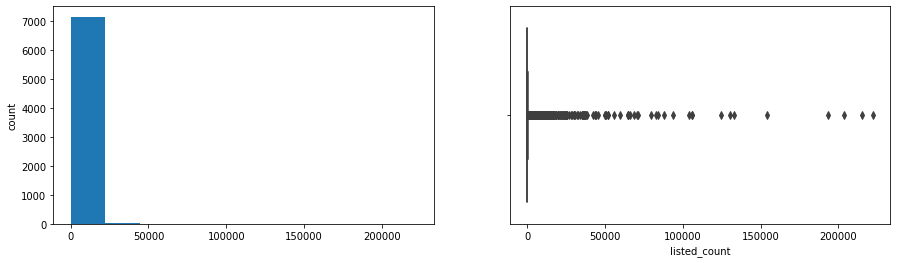

urls_end
Skew : 10.9


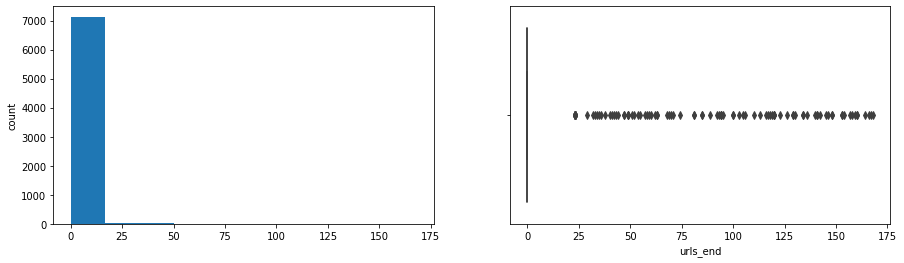

retweet_count
Skew : 13.92


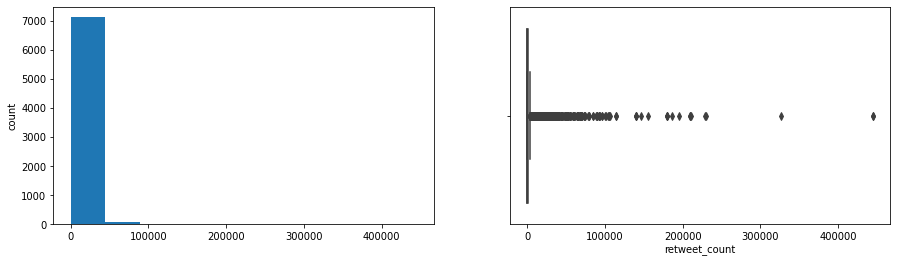

reply_count
Skew : 9.0


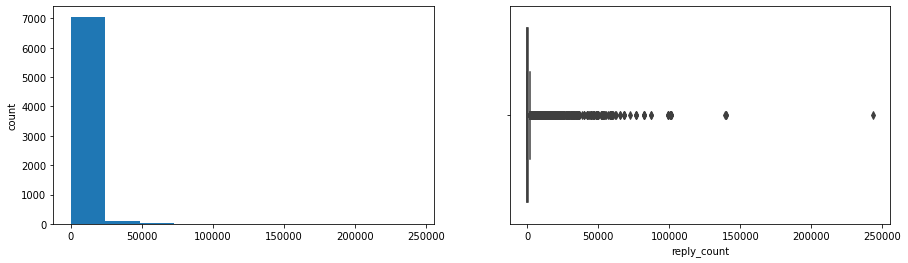

like_count
Skew : 10.27


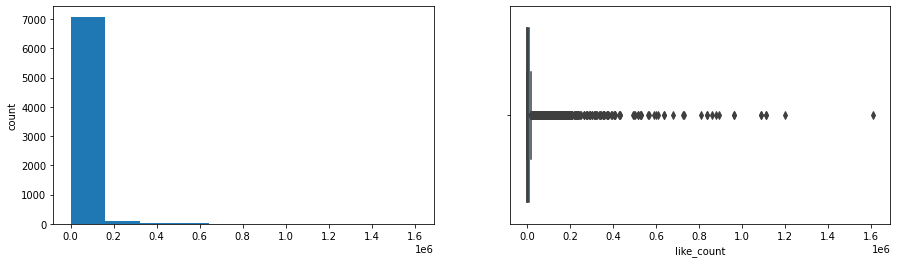

quote_count
Skew : 11.81


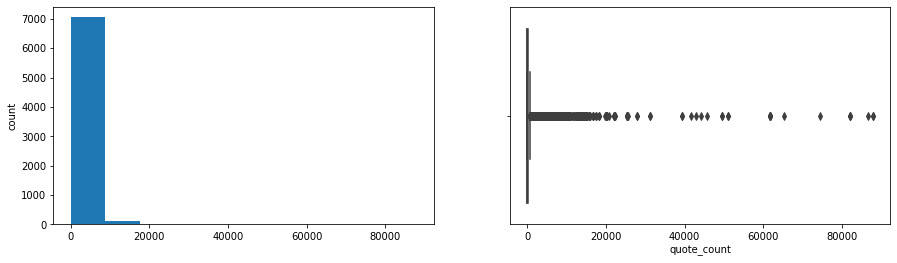

survivability
Skew : 20.99


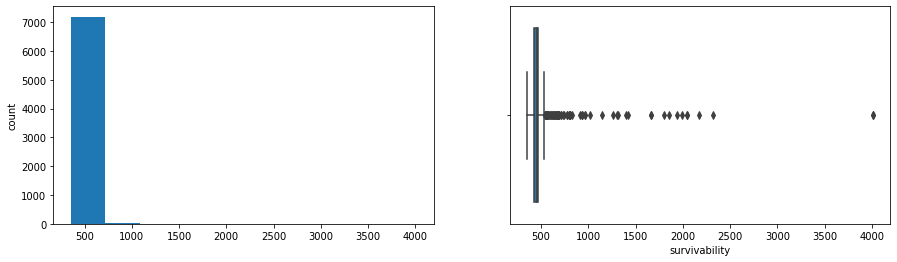

folws_stat_foloing_rt
Skew : 44.93


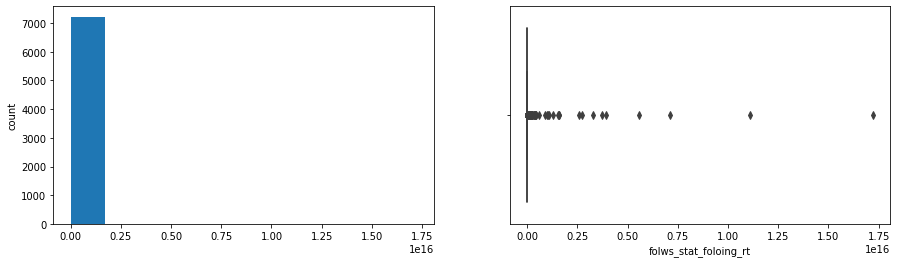

Influence
Skew : 0.67


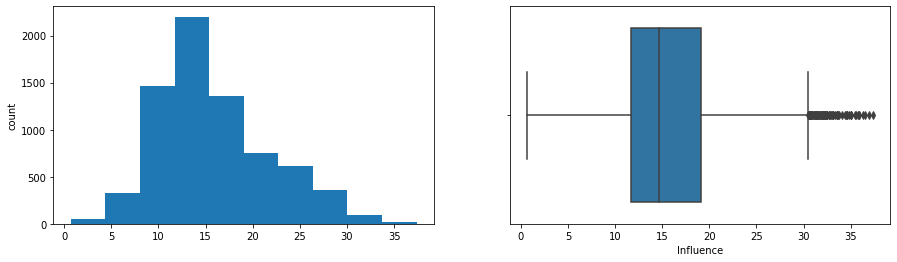

followee_followers_rt
Skew : 18.64


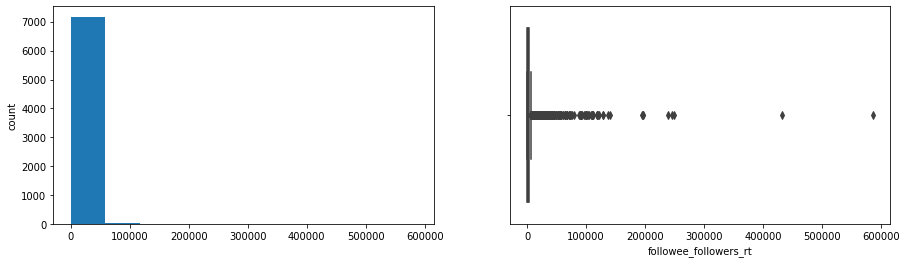

sociability
Skew : -0.2


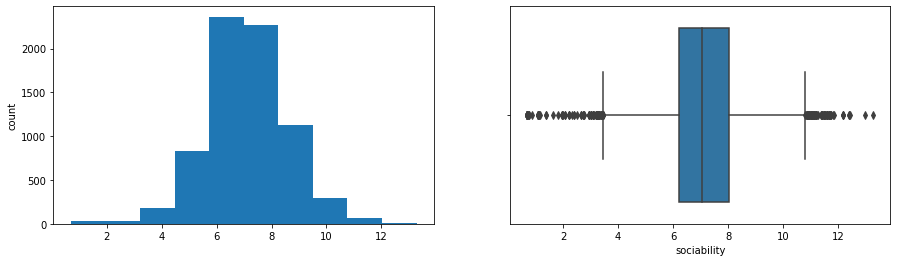

likes_tweets_rt
Skew : 10.27


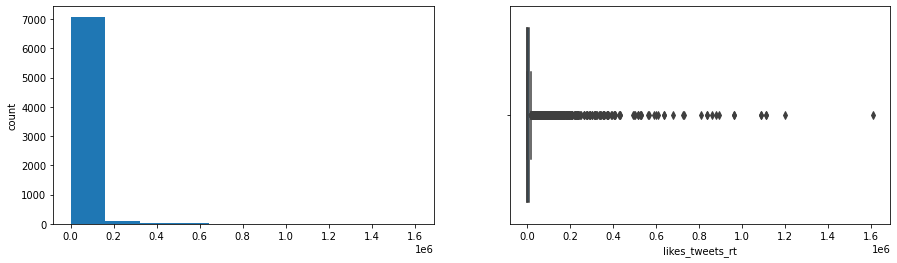

favorabilty
Skew : 0.05


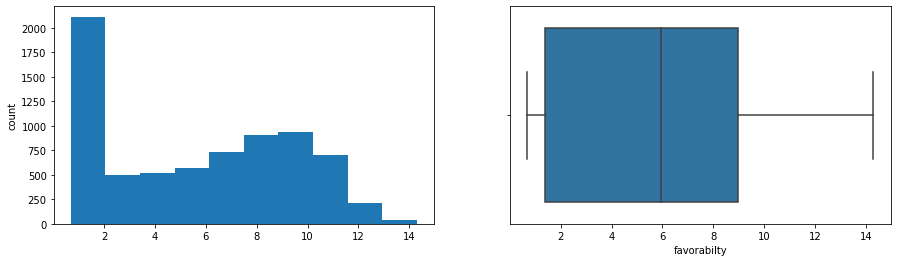

tw_dy_rt
Skew : 6.22


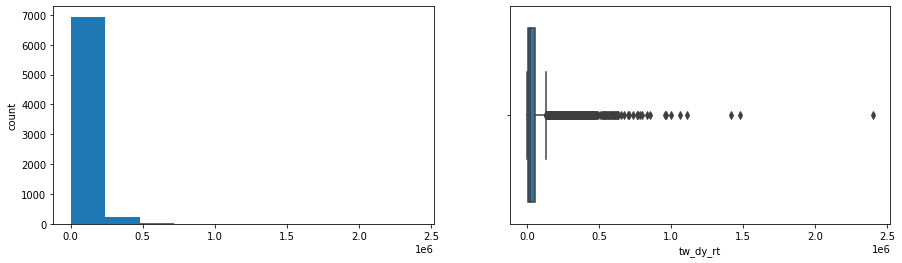

activiness
Skew : -0.69


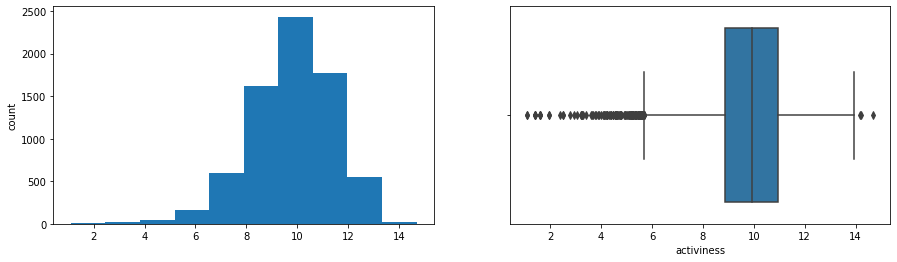

In [ ]:
cont_cols = list(dve_df.columns)

for col in cont_cols:

    print(col)
    
    print('Skew :',round(dve_df[col].skew(),2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    dve_df[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = dve_df[col])
    
    plt.show()

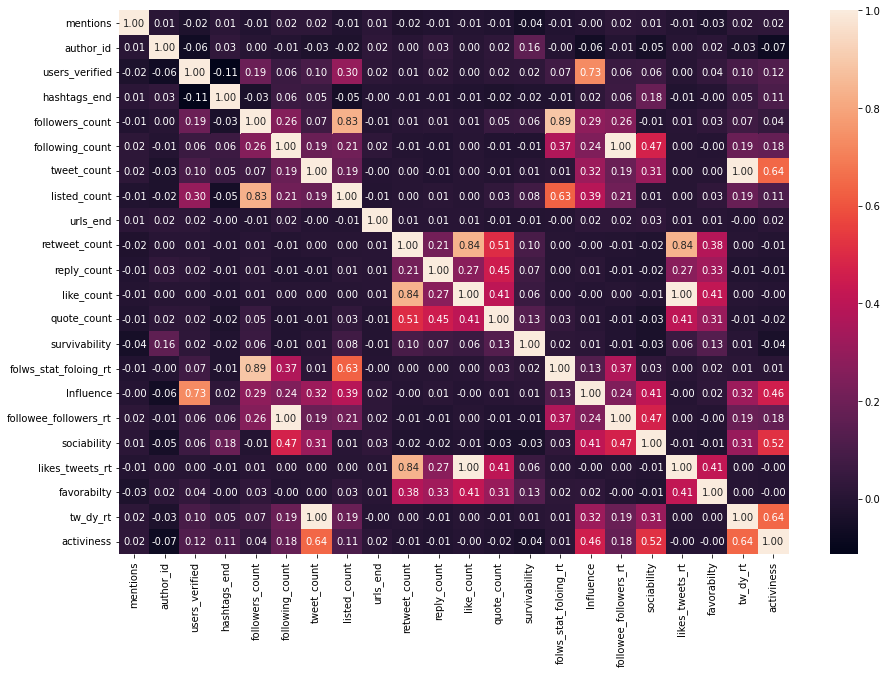

In [ ]:
plt.figure(figsize = (15, 10))

sns.heatmap(dve_df.corr(), annot = True, fmt = '0.2f')

plt.show()

In [ ]:
# Scaling our data

In [ ]:
scaler = StandardScaler()
dve_df_scaled = pd.DataFrame(scaler.fit_transform(dve_df),columns=dve_df.columns)

In [ ]:
dve_df_scaled

,mentions,author_id,users_verified,hashtags_end,followers_count,following_count,tweet_count,listed_count,urls_end,retweet_count,...,quote_count,survivability,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty,tw_dy_rt,activiness
0,-0.336796,-0.213978,-0.507210,-0.377741,-0.102077,-0.264830,-0.555804,-0.160832,-0.103432,0.514716,...,-0.143864,37.380013,-0.037892,-1.789767,-0.264825,-1.288220,0.094334,1.171047,-0.555804,-3.735041
1,-0.262640,6.251239,-0.507210,-0.377741,-0.102057,-0.265746,-0.551670,-0.160832,-0.103432,0.514851,...,-0.143864,37.380013,-0.037892,-1.206351,-0.265745,-1.339215,0.095389,1.171838,-0.551670,-2.269396
2,-0.534545,6.785555,-0.507210,-0.377741,-0.102062,-0.268423,-0.500206,-0.160832,-0.103432,-0.152359,...,-0.188240,19.685938,-0.037892,-1.284423,-0.268422,-1.514256,-0.237267,0.417685,-0.500206,-0.748199
3,-0.423311,-0.213978,-0.507210,-0.377741,-0.101994,-0.256940,0.340972,-0.160318,-0.103432,11.814314,...,16.913058,18.135480,-0.037892,-0.769220,-0.256940,-0.961215,3.912435,1.824540,0.340972,0.930720
4,-0.534545,3.601034,1.971569,0.448009,0.055794,1.807408,1.797865,0.126668,-0.103432,1.310849,...,6.213394,16.773592,-0.036958,1.783599,1.807407,2.151593,0.360169,1.319775,1.797865,1.514578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7223,-0.213202,-0.213978,-0.507210,-0.377741,-0.101590,0.032804,0.385558,-0.149655,-0.103432,-0.241267,...,-0.223189,-0.951912,-0.037892,-0.180483,0.032804,0.868566,-0.257597,-1.304611,0.385558,0.960075
7224,-0.237921,-0.213978,-0.507210,-0.377741,-0.101764,-0.253136,0.330045,-0.157877,-0.103432,-0.241267,...,-0.223189,-0.951912,-0.037892,-0.328924,-0.253136,-0.846582,-0.257597,-1.304611,0.330045,0.923303
7225,-0.534545,-0.213978,1.971569,-0.377741,0.344568,-0.135350,1.135190,1.897655,-0.103432,-0.240863,...,-0.221580,-0.962388,-0.030411,2.137341,-0.135351,0.342650,-0.257296,-0.670752,1.135190,1.314485
7226,-0.274999,-0.213978,-0.507210,-0.377741,-0.102067,-0.270465,-0.545227,-0.160832,-0.103432,-0.226404,...,-0.194678,-0.962388,-0.037892,-1.401031,-0.270464,-1.687209,-0.232098,0.477492,-0.545227,-1.734350


In [ ]:
# Principal Component Analysis

In [ ]:
#droppig na if any
dve_df = dve_df.dropna(how = 'any')
dve_df.head(5)
dve_df.fillna(0)
dve_df.fillna(0,inplace=True)
dve_df.fillna(0,inplace=True)
dve_df.replace([np.inf, -np.inf], np.nan, inplace=True)
dve_df.replace(np.nan, 0)


,mentions,author_id,users_verified,hashtags_end,followers_count,following_count,tweet_count,listed_count,urls_end,retweet_count,...,quote_count,survivability,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty,tw_dy_rt,activiness
0,16.0,1.929236e+07,0.0,0.0,14.0,177.0,36.0,0.0,0.0,11241,...,345,4013,1.960000e+02,5.283204,178.071429,5.187785,23354.027778,10.058568,37.000249,3.637593
1,22.0,1.210000e+18,0.0,0.0,78.0,164.0,426.0,0.0,0.0,11243,...,345,4013,6.084000e+03,8.713582,165.012821,5.112065,23424.002347,10.061559,427.000249,6.059124
4,0.0,1.310000e+18,0.0,0.0,62.0,126.0,5282.0,0.0,0.0,1322,...,152,2324,3.844000e+03,8.254529,127.016129,4.852156,1350.000189,7.208600,5283.000430,8.572439
7,9.0,3.558913e+08,0.0,0.0,282.0,289.0,84653.0,4.0,0.0,179259,...,74529,2176,7.952400e+04,11.283827,290.003546,5.673335,276711.000012,12.530733,84654.000460,11.346339
15,0.0,7.140000e+17,1.0,28.0,512453.0,29593.0,222121.0,2238.0,0.0,23079,...,27994,2046,2.626081e+11,26.293929,29594.000002,10.295361,40994.000005,10.621205,222122.000489,12.310987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39521,26.0,3.255539e+07,0.0,0.0,1592.0,4402.0,88860.0,87.0,0.0,0,...,0,354,2.534464e+06,14.745493,4403.000628,8.390269,1.000011,0.693153,88861.002825,11.394840
39527,24.0,8.170270e+07,0.0,0.0,1029.0,343.0,83622.0,23.0,0.0,0,...,0,354,1.058841e+06,13.872686,344.000972,5.843547,1.000012,0.693153,83623.002825,11.334086
39536,0.0,5.763262e+06,1.0,0.0,1449796.0,2015.0,159593.0,16024.0,0.0,6,...,7,353,2.101908e+12,28.373867,2016.000001,7.609367,21.000006,3.091043,159594.002833,11.980395
39542,21.0,2.896184e+09,0.0,0.0,44.0,97.0,1034.0,0.0,0.0,221,...,124,353,1.936000e+03,7.568896,98.022727,4.595349,1693.000967,7.434848,1035.002833,6.943125


In [ ]:
(dve_df.replace(-np.inf, np.nan))

,mentions,author_id,users_verified,hashtags_end,followers_count,following_count,tweet_count,listed_count,urls_end,retweet_count,...,quote_count,survivability,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty,tw_dy_rt,activiness
0,16.0,1.929236e+07,0.0,0.0,14.0,177.0,36.0,0.0,0.0,11241,...,345,4013,1.960000e+02,5.283204,178.071429,5.187785,23354.027778,10.058568,37.000249,3.637593
1,22.0,1.210000e+18,0.0,0.0,78.0,164.0,426.0,0.0,0.0,11243,...,345,4013,6.084000e+03,8.713582,165.012821,5.112065,23424.002347,10.061559,427.000249,6.059124
4,0.0,1.310000e+18,0.0,0.0,62.0,126.0,5282.0,0.0,0.0,1322,...,152,2324,3.844000e+03,8.254529,127.016129,4.852156,1350.000189,7.208600,5283.000430,8.572439
7,9.0,3.558913e+08,0.0,0.0,282.0,289.0,84653.0,4.0,0.0,179259,...,74529,2176,7.952400e+04,11.283827,290.003546,5.673335,276711.000012,12.530733,84654.000460,11.346339
15,0.0,7.140000e+17,1.0,28.0,512453.0,29593.0,222121.0,2238.0,0.0,23079,...,27994,2046,2.626081e+11,26.293929,29594.000002,10.295361,40994.000005,10.621205,222122.000489,12.310987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39521,26.0,3.255539e+07,0.0,0.0,1592.0,4402.0,88860.0,87.0,0.0,0,...,0,354,2.534464e+06,14.745493,4403.000628,8.390269,1.000011,0.693153,88861.002825,11.394840
39527,24.0,8.170270e+07,0.0,0.0,1029.0,343.0,83622.0,23.0,0.0,0,...,0,354,1.058841e+06,13.872686,344.000972,5.843547,1.000012,0.693153,83623.002825,11.334086
39536,0.0,5.763262e+06,1.0,0.0,1449796.0,2015.0,159593.0,16024.0,0.0,6,...,7,353,2.101908e+12,28.373867,2016.000001,7.609367,21.000006,3.091043,159594.002833,11.980395
39542,21.0,2.896184e+09,0.0,0.0,44.0,97.0,1034.0,0.0,0.0,221,...,124,353,1.936000e+03,7.568896,98.022727,4.595349,1693.000967,7.434848,1035.002833,6.943125


In [ ]:
with pd.option_context('mode.use_inf_as_na', True):
  dve_df.dropna(inplace=True)

In [ ]:
dve_df = dve_df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)


In [ ]:
pd.set_option('mode.use_inf_as_na', True)
dve_df.dropna(inplace=True)


In [ ]:
#droppig na if any
dve_df_scaled = dve_df_scaled.dropna(how = 'any')
dve_df_scaled.fillna(0)
dve_df_scaled.fillna(0,inplace=True)
dve_df_scaled.fillna(0,inplace=True)
dve_df_scaled.replace([np.inf, -np.inf], np.nan, inplace=True)
dve_df_scaled.replace(np.nan, 0)


,mentions,author_id,users_verified,hashtags_end,followers_count,following_count,tweet_count,listed_count,urls_end,retweet_count,...,quote_count,survivability,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty,tw_dy_rt,activiness
0,-0.336796,-0.213978,-0.507210,-0.377741,-0.102077,-0.264830,-0.555804,-0.160832,-0.103432,0.514716,...,-0.143864,37.380013,-0.037892,-1.789767,-0.264825,-1.288220,0.094334,1.171047,-0.555804,-3.735041
1,-0.262640,6.251239,-0.507210,-0.377741,-0.102057,-0.265746,-0.551670,-0.160832,-0.103432,0.514851,...,-0.143864,37.380013,-0.037892,-1.206351,-0.265745,-1.339215,0.095389,1.171838,-0.551670,-2.269396
2,-0.534545,6.785555,-0.507210,-0.377741,-0.102062,-0.268423,-0.500206,-0.160832,-0.103432,-0.152359,...,-0.188240,19.685938,-0.037892,-1.284423,-0.268422,-1.514256,-0.237267,0.417685,-0.500206,-0.748199
3,-0.423311,-0.213978,-0.507210,-0.377741,-0.101994,-0.256940,0.340972,-0.160318,-0.103432,11.814314,...,16.913058,18.135480,-0.037892,-0.769220,-0.256940,-0.961215,3.912435,1.824540,0.340972,0.930720
4,-0.534545,3.601034,1.971569,0.448009,0.055794,1.807408,1.797865,0.126668,-0.103432,1.310849,...,6.213394,16.773592,-0.036958,1.783599,1.807407,2.151593,0.360169,1.319775,1.797865,1.514578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7223,-0.213202,-0.213978,-0.507210,-0.377741,-0.101590,0.032804,0.385558,-0.149655,-0.103432,-0.241267,...,-0.223189,-0.951912,-0.037892,-0.180483,0.032804,0.868566,-0.257597,-1.304611,0.385558,0.960075
7224,-0.237921,-0.213978,-0.507210,-0.377741,-0.101764,-0.253136,0.330045,-0.157877,-0.103432,-0.241267,...,-0.223189,-0.951912,-0.037892,-0.328924,-0.253136,-0.846582,-0.257597,-1.304611,0.330045,0.923303
7225,-0.534545,-0.213978,1.971569,-0.377741,0.344568,-0.135350,1.135190,1.897655,-0.103432,-0.240863,...,-0.221580,-0.962388,-0.030411,2.137341,-0.135351,0.342650,-0.257296,-0.670752,1.135190,1.314485
7226,-0.274999,-0.213978,-0.507210,-0.377741,-0.102067,-0.270465,-0.545227,-0.160832,-0.103432,-0.226404,...,-0.194678,-0.962388,-0.037892,-1.401031,-0.270464,-1.687209,-0.232098,0.477492,-0.545227,-1.734350


In [ ]:
dve_df[~dve_df.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)

,mentions,author_id,users_verified,hashtags_end,followers_count,following_count,tweet_count,listed_count,urls_end,retweet_count,...,quote_count,survivability,folws_stat_foloing_rt,Influence,followee_followers_rt,sociability,likes_tweets_rt,favorabilty,tw_dy_rt,activiness
0,16.0,1.929236e+07,0.0,0.0,14.0,177.0,36.0,0.0,0.0,11241.0,...,345.0,4013.0,1.960000e+02,5.283204,178.071429,5.187785,23354.027778,10.058568,37.000249,3.637593
1,22.0,1.210000e+18,0.0,0.0,78.0,164.0,426.0,0.0,0.0,11243.0,...,345.0,4013.0,6.084000e+03,8.713582,165.012821,5.112065,23424.002347,10.061559,427.000249,6.059124
4,0.0,1.310000e+18,0.0,0.0,62.0,126.0,5282.0,0.0,0.0,1322.0,...,152.0,2324.0,3.844000e+03,8.254529,127.016129,4.852156,1350.000189,7.208600,5283.000430,8.572439
7,9.0,3.558913e+08,0.0,0.0,282.0,289.0,84653.0,4.0,0.0,179259.0,...,74529.0,2176.0,7.952400e+04,11.283827,290.003546,5.673335,276711.000012,12.530733,84654.000460,11.346339
15,0.0,7.140000e+17,1.0,28.0,512453.0,29593.0,222121.0,2238.0,0.0,23079.0,...,27994.0,2046.0,2.626081e+11,26.293929,29594.000002,10.295361,40994.000005,10.621205,222122.000489,12.310987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39521,26.0,3.255539e+07,0.0,0.0,1592.0,4402.0,88860.0,87.0,0.0,0.0,...,0.0,354.0,2.534464e+06,14.745493,4403.000628,8.390269,1.000011,0.693153,88861.002825,11.394840
39527,24.0,8.170270e+07,0.0,0.0,1029.0,343.0,83622.0,23.0,0.0,0.0,...,0.0,354.0,1.058841e+06,13.872686,344.000972,5.843547,1.000012,0.693153,83623.002825,11.334086
39536,0.0,5.763262e+06,1.0,0.0,1449796.0,2015.0,159593.0,16024.0,0.0,6.0,...,7.0,353.0,2.101908e+12,28.373867,2016.000001,7.609367,21.000006,3.091043,159594.002833,11.980395
39542,21.0,2.896184e+09,0.0,0.0,44.0,97.0,1034.0,0.0,0.0,221.0,...,124.0,353.0,1.936000e+03,7.568896,98.022727,4.595349,1693.000967,7.434848,1035.002833,6.943125


In [ ]:
18

dve_df.replace([np.inf, -np.inf], np.nan)

dve_df.dropna(inplace=True)

In [ ]:
# Defining the number of principal components to generate
n = dve_df_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components = n, random_state = 1)

dve_df_pca1 = pd.DataFrame(pca.fit_transform(dve_df_scaled))

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

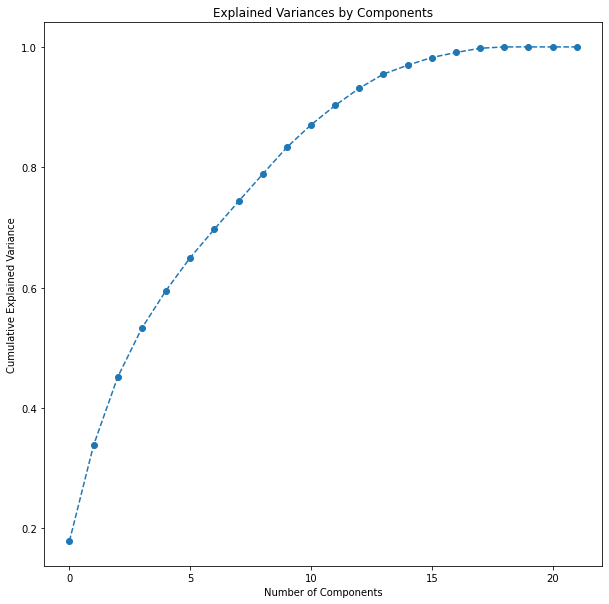

In [ ]:
# Plotting the explained cumulative variance by principal components
plt.figure(figsize = (10, 10))

plt.plot(range(0, 22), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
# Finding the least number of components that can explain more than 70% variance

sum = 0

for ix, i in enumerate(exp_var):

  sum = sum + i

  if (sum>0.70):

    print("Number of PCs that explain at least 70% variance:", ix + 1)
    break

Number of PCs that explain at least 70% variance: 8


In [ ]:
pc_comps = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']

dve_df_pca = pd.DataFrame(np.round(pca.components_[:8,:],2), index=pc_comps, columns=dve_df_scaled.columns)

dve_df_pca.T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
mentions,0.01,-0.02,-0.03,0.05,0.03,-0.13,-0.13,0.74
author_id,-0.03,0.02,0.03,0.04,0.18,0.51,-0.48,0.01
users_verified,0.19,0.01,0.06,-0.37,-0.57,0.08,-0.08,-0.02
hashtags_end,0.04,-0.02,-0.10,0.18,0.10,0.06,-0.06,0.08
followers_count,0.29,0.03,0.45,-0.15,0.20,-0.07,-0.00,0.04
following_count,0.33,-0.02,0.08,0.51,-0.11,0.05,0.03,-0.05
tweet_count,0.32,-0.02,-0.35,-0.17,0.33,-0.02,0.02,-0.01
listed_count,0.30,0.02,0.36,-0.25,0.13,-0.05,-0.02,0.02
urls_end,0.01,0.00,-0.01,0.03,-0.09,0.07,-0.35,0.54
retweet_count,0.01,0.47,-0.04,0.03,-0.00,-0.16,-0.18,-0.08


Each principal component is a linear combination of the original features.


The magnitude of the weights multiplied with each of the original features that comprise a principal component, is one way to look at the importance of each of the original features. This is relevant in deciding which features in the dataset are important for the problem and which ones are not. Normally, a threshold is used as a cut-off to determine if a feature is important or not. For example, we can consider only those weights with an absolute value greater than 0.25 as significant.

In [ ]:
def color_high(val):
  if val < -0.25:                           # We can decide any value as per our understanding
    return 'background: pink'

  elif val > 0.25:
    return 'background: skyblue'

dve_df_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
mentions,0.010000,-0.020000,-0.030000,0.050000,0.030000,-0.130000,-0.130000,0.740000
author_id,-0.030000,0.020000,0.030000,0.040000,0.180000,0.510000,-0.480000,0.010000
users_verified,0.190000,0.010000,0.060000,-0.370000,-0.570000,0.080000,-0.080000,-0.020000
hashtags_end,0.040000,-0.020000,-0.100000,0.180000,0.100000,0.060000,-0.060000,0.080000
followers_count,0.290000,0.030000,0.450000,-0.150000,0.200000,-0.070000,-0.000000,0.040000
following_count,0.330000,-0.020000,0.080000,0.510000,-0.110000,0.050000,0.030000,-0.050000
tweet_count,0.320000,-0.020000,-0.350000,-0.170000,0.330000,-0.020000,0.020000,-0.010000
listed_count,0.300000,0.020000,0.360000,-0.250000,0.130000,-0.050000,-0.020000,0.020000
urls_end,0.010000,0.000000,-0.010000,0.030000,-0.090000,0.070000,-0.350000,0.540000
retweet_count,0.010000,0.470000,-0.040000,0.030000,-0.000000,-0.160000,-0.180000,-0.080000


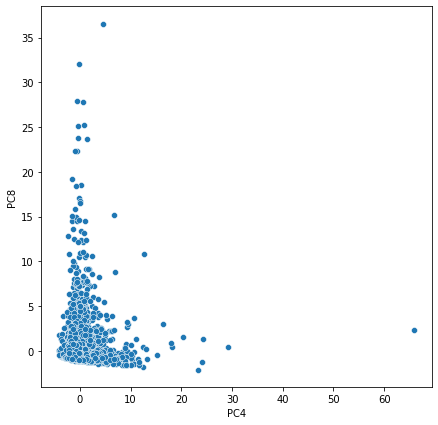

In [ ]:
plt.figure(figsize= (7,7))

sns.scatterplot(x = dve_df_pca1[0], y = dve_df_pca1[1])

plt.xlabel("PC4")

plt.ylabel("PC8")

plt.show()

# t_SNE

In [ ]:
# 2D visaulization 

# Fitting the t-SNE with the number of competents equal to 2

tsne = TSNE(n_components= 2, random_state= 1)

data_tsne = tsne.fit_transform(dve_df_scaled)


In [ ]:
# Converting the embeddings to a dataframe 

data_tsne = pd.DataFrame(data_tsne, columns = ['X1', 'X2'])



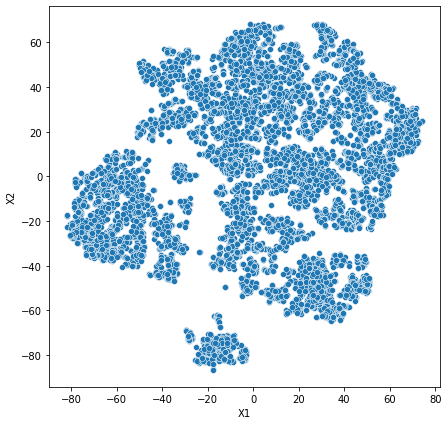

In [ ]:
# Scatter plot for two components
plt.figure(figsize = (7,7))

sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)

plt.show()

In [ ]:
# Fitting t-SNE with number of components equal to 3 
tsne = TSNE(n_components = 3, random_state = 1)

data_tsne = tsne.fit_transform(dve_df_scaled)

In [ ]:
data_tsne = pd.DataFrame(data_tsne, columns = ['X1', 'X2', 'X3'])


In [ ]:
# Scatter plot for all three components
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(111, projection = '3d')

x = data_tsne['X1']

y = data_tsne['X2']

z = data_tsne['X3']

ax.scatter(x, y, z)

plt.show()

In [ ]:
for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
    
    data_tsne = tsne.fit_transform(dve_df_scaled)
    
    data_tsne = pd.DataFrame(data_tsne)
    
    data_tsne.columns = ['X1', 'X2']
    
    plt.figure(figsize = (7, 7))
    
    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
    
    plt.title("perplexity = {}".format(i))